# GRIP: The Sparks Foundation
## Auther: Suchismita Mallick
### DataScience and Business Analytics Intern 
### Task 1 : Prediction Using Supervise Machine Learning

In [1]:
import pandas as pd #use for read our file or data
import numpy as np   #use for matrix multiplication
import matplotlib.pyplot as plt # data Vidualization
import seaborn as sns #plotting a figure
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

## Import Data

In [2]:
A=pd.read_csv("/Users/Admin/Desktop/Task1 grip.csv")

In [3]:
A.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# Check if there any null value in the Dataset
A.isnull == True

False

In [5]:
A.shape

(25, 2)

In [6]:
A.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## Detect Outliers from the given Dataset

In [8]:
H=A['Hours']
S=A['Scores']

<Axes: >

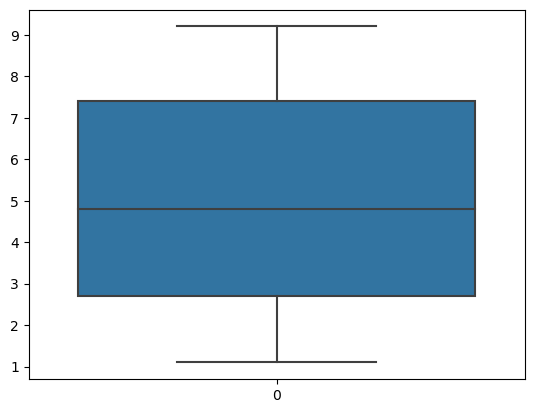

In [9]:
sns.boxplot(H)

<Axes: >

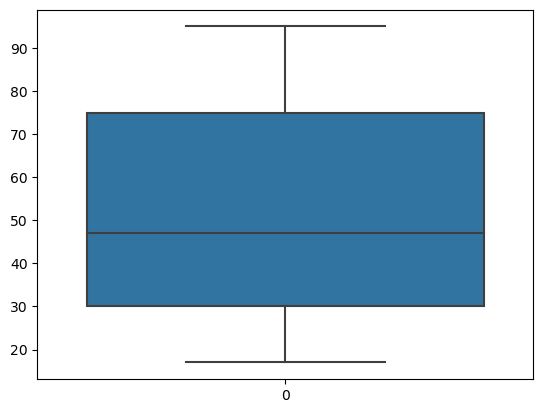

In [10]:
sns.boxplot(S)

##### From the above boxplots we see that there is no outliers present in our dataset.

## Scatter Plots of the data

Text(0.5, 1.0, 'Scores Vs Study Hours')

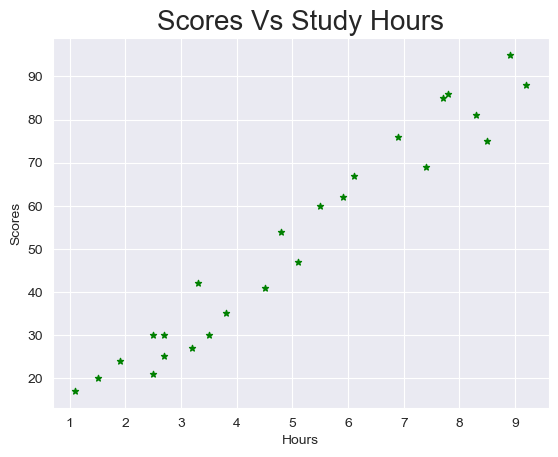

In [11]:
sns.set_style('darkgrid')
A.plot(kind='scatter',x='Hours',y='Scores', color='green',marker='*',);
plt.title('Scores Vs Study Hours',size=20)

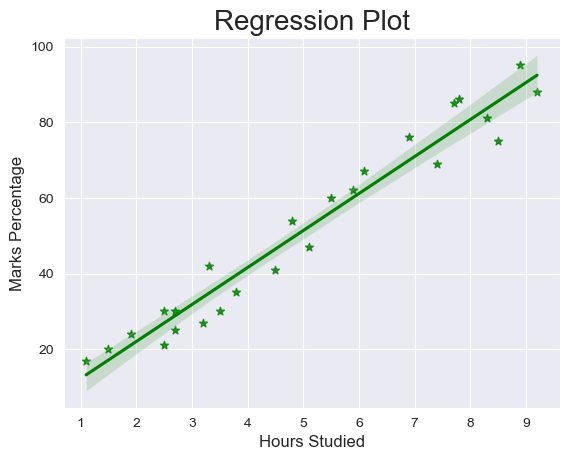

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [12]:
# From the above scatter plot there looks to be correlation between the 'Marks Percentage' and 'Hours Studied', Lets plot a regression line to confirm the correlation.
sns.regplot(x= A['Hours'], y= A['Scores'], color='green', marker='*')
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(A.corr())

###### From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and % of score.

In [13]:
## Defining X and y from the Data
X = A.iloc[:, :-1].values  
y = A.iloc[:, 1].values

### Splitting the Dataset in Testing And Training

In [14]:
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 0)

### Now Fitting The Dataset Into The Model

In [15]:
regression = LinearRegression()
regression.fit(train_X, train_y)
print("Trained the Model")

Trained the Model


In [16]:
## Making Prediction

In [17]:
pred_y = regression.predict(test_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in test_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


### Comparing Actual vs Prediction

In [18]:
compare_scores = pd.DataFrame({'Actual Marks': test_y, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


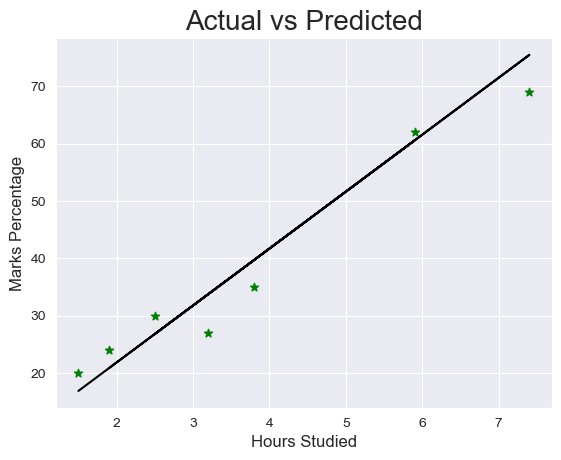

In [19]:
plt.scatter(x=test_X, y=test_y, color='green', marker='*')
plt.plot(test_X, pred_y, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.xlabel('Hours Studied', size=12)
plt.ylabel('Marks Percentage', size=12)
plt.show()

In [20]:
## Now we have to calculating the accuracy of the model

In [22]:
print('Mean absolute error: ',mean_absolute_error(test_y,pred_y))

Mean absolute error:  4.130879918502482


###### If a student studies for 9.25hrs/day then what will be the predicted scores?

In [26]:
Hours = [9.25]
answer = regression.predict([Hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893


### According to this Regression Model if a student studies 9.25hrs/day she/he is likely to score 93.89 marks.